In [1]:
%matplotlib inline
import os
import sys
import string
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  
from netCDF4 import Dataset as ncdf
from math import *
import numpy as np
import xarray as xr
import pandas as pd



/gpfs/u/apps/dav/opt/python/3.6.8/gnu/7.3.0/pkg-library/20190326/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
pathbase='/glade/p/ral/nsap/jsauer/JAS/A2E-MMC/TTURAW'
year='2013'
dataDir='NCDF-Data'
inFile='TTU200m_2013_1108-1Hz.nc'
datasetFile = "{:s}/{:s}/{:s}/{:s}".format(pathbase,year,dataDir,inFile)
xrDS=xr.open_dataset(datasetFile)


In [3]:
xrDS

<xarray.Dataset>
Dimensions:  (Times: 86400, levels: 10)
Coordinates:
  * Times    (Times) datetime64[ns] 2013-11-08 ... 2013-11-08T23:59:59
  * levels   (levels) int32 0 1 2 3 4 5 6 7 8 9
Data variables:
    Z        (levels, Times) float64 ...
    U        (levels, Times) float64 ...
    V        (levels, Times) float64 ...
    W        (levels, Times) float64 ...
    TH       (levels, Times) float64 ...
    P        (levels, Times) float64 ...
    TKE      (levels, Times) float64 ...
    TAU11    (levels, Times) float64 ...
    TAU12    (levels, Times) float64 ...
    TAU13    (levels, Times) float64 ...
    TAU22    (levels, Times) float64 ...
    TAU23    (levels, Times) float64 ...
    TAU33    (levels, Times) float64 ...
    HFLUX    (levels, Times) float64 ...

In [4]:
def format_datetime_axis(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    ax.set_xlabel('Time [UTC]')

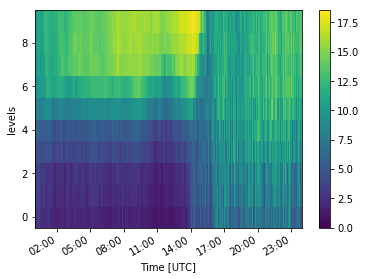

In [5]:
np.sqrt(np.square(xrDS['U'])+np.square(xrDS['V'])).plot()
format_datetime_axis()

In [6]:
pdDF=xrDS.to_dataframe()

In [7]:
pdDF.head()

Z      U      V      W      TH       P  TKE  TAU11  \
Times      levels                                                            
2013-11-08 0        0.914 -0.070  2.465 -0.055  292.62  908.63  NaN    NaN   
           1        2.438  0.217  3.358  0.091  292.83  908.90  NaN    NaN   
           2        3.962  0.555  4.779  0.217  293.09  908.19  NaN    NaN   
           3       10.058 -0.172  4.991  0.248  293.26  907.69  NaN    NaN   
           4       16.764  0.173  5.579  0.023  293.49  907.32  NaN    NaN   

                   TAU12  TAU13  TAU22  TAU23  TAU33  HFLUX  
Times      levels                                            
2013-11-08 0         NaN    NaN    NaN    NaN    NaN    NaN  
           1         NaN    NaN    NaN    NaN    NaN    NaN  
           2         NaN    NaN    NaN    NaN    NaN    NaN  
           3         NaN    NaN    NaN    NaN    NaN    NaN  
           4         NaN    NaN    NaN    NaN    NaN    NaN

In [8]:
pdDF['U'].unstack()

levels,0,1,2,3,4,5,6,7,8,9
Times,,,,,,,,,,
2013-11-08 00:00:00,-0.070,0.217,0.555,-0.172,0.173,-0.047,0.177,0.058,0.567,1.066
2013-11-08 00:00:01,0.440,0.075,0.273,-0.272,0.153,0.225,-0.341,0.059,0.816,1.016
2013-11-08 00:00:02,0.149,-0.382,-0.420,-0.056,-0.119,0.181,-0.291,0.207,0.586,0.985
2013-11-08 00:00:03,-0.186,-0.422,-1.108,-0.439,0.167,0.014,NaN,0.186,0.693,1.015
2013-11-08 00:00:04,-0.636,-0.906,0.027,-0.357,-0.200,0.239,-0.314,0.191,0.525,1.073
2013-11-08 00:00:05,-0.356,-0.546,0.252,0.188,0.146,0.188,0.217,0.149,0.693,1.212
2013-11-08 00:00:06,-0.255,-0.059,0.209,-0.726,0.120,-0.024,0.213,0.178,0.288,1.226
2013-11-08 00:00:07,-0.432,0.367,-0.081,-0.447,0.137,-0.228,-0.187,0.191,0.793,1.219
2013-11-08 00:00:08,0.022,0.034,-0.677,-0.352,0.022,-0.215,-0.212,0.220,0.608,1.327


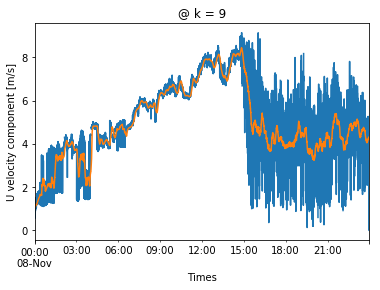

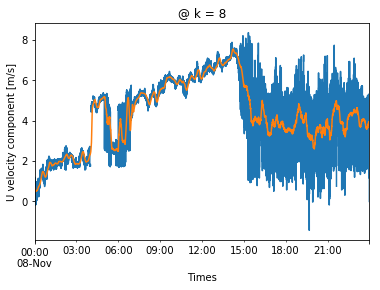

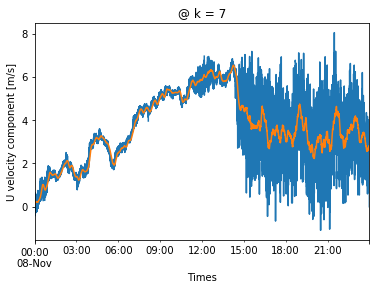

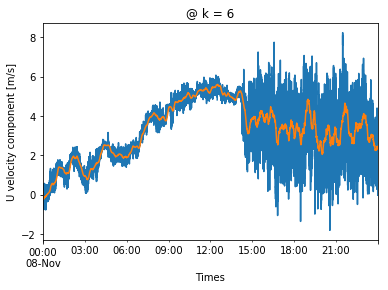

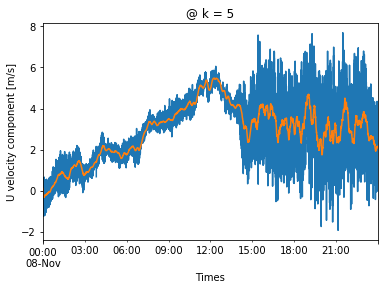

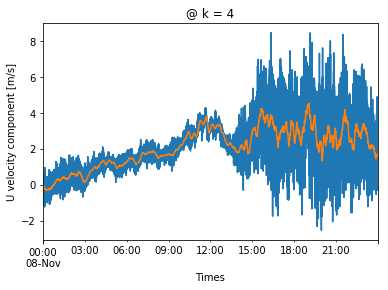

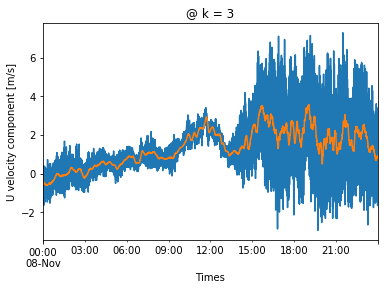

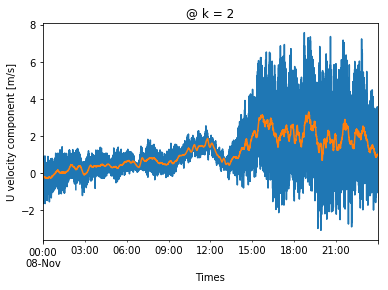

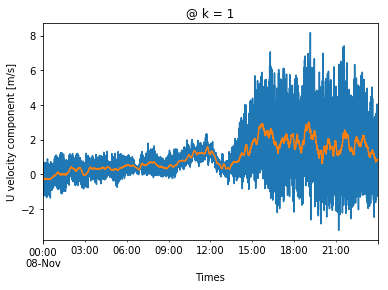

In [9]:
# Plot time history by taking a cross section ("xs") of level 1 (i.e., zindex)
plotvar = 'U'
k = 0

for k in range(9,0,-1):
    plt.figure()
    pdDF.xs(k,level=1)[plotvar].plot()
    dfm0 = pdDF.xs(k,level=1)[plotvar].rolling('10min').mean()
    dfm0.plot()
    plt.ylabel('U velocity component [m/s]')
    plt.title('@ k = {:d}'.format(k))

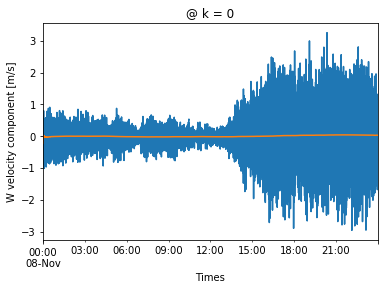

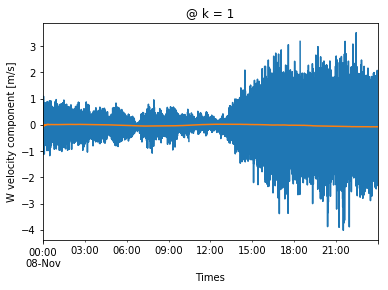

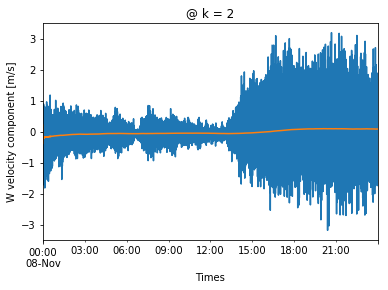

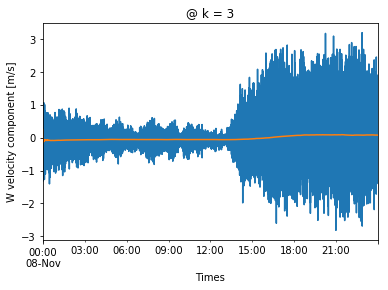

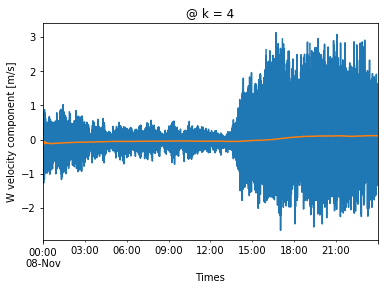

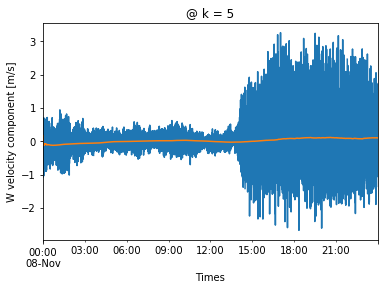

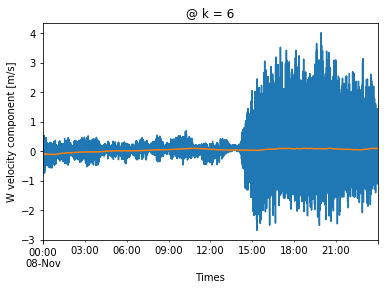

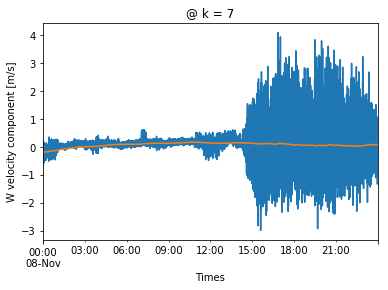

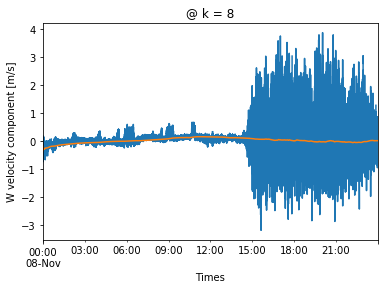

In [11]:
plotvar = 'W'
k = 0

for k in range(9):
    plt.figure()
    pdDF.xs(k,level=1)[plotvar].plot()
    dfm0 = pdDF.xs(k,level=1)[plotvar].rolling('240min').mean()
    dfm0.plot()
    plt.ylabel('W velocity component [m/s]')
    plt.title('@ k = {:d}'.format(k))

In [12]:
pdDF.index[1]
type(pdDF.xs(0,level=1)['U'])
type(pdDF.xs(0,level=1)['U'].index)
pdDF.xs(0,level=1).index.hour
pdDF.xs(0,level=1)[pdDF.xs(0,level=1).index.hour < 1]

,Z,U,V,W,TH,P,TKE,TAU11,TAU12,TAU13,TAU22,TAU23,TAU33,HFLUX
Times,,,,,,,,,,,,,,
2013-11-08 00:00:00,0.914,-0.070,2.465,-0.055,292.62,908.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-08 00:00:01,0.914,0.440,2.689,-0.402,292.66,908.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-08 00:00:02,0.914,0.149,2.538,0.526,292.70,908.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-08 00:00:03,0.914,-0.186,3.141,-0.267,292.70,908.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-08 00:00:04,0.914,-0.636,2.645,-0.679,292.69,908.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-08 00:00:05,0.914,-0.356,2.574,0.023,292.70,908.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-08 00:00:06,0.914,-0.255,2.806,-0.287,292.68,908.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-08 00:00:07,0.914,-0.432,2.905,0.101,292.65,908.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-08 00:00:08,0.914,0.022,3.790,-0.397,292.68,908.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


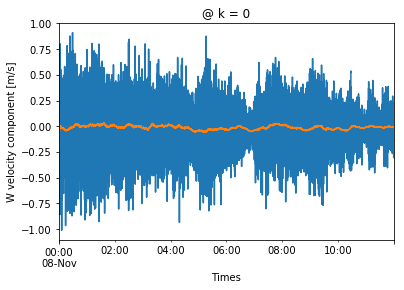

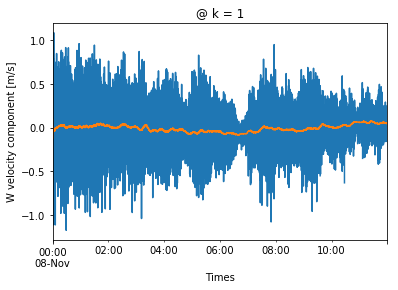

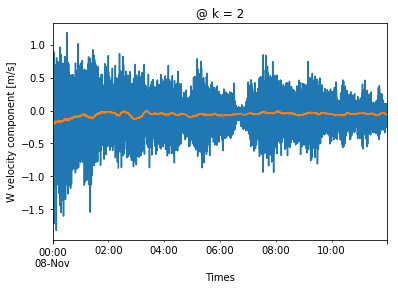

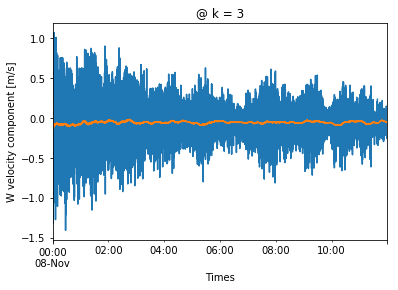

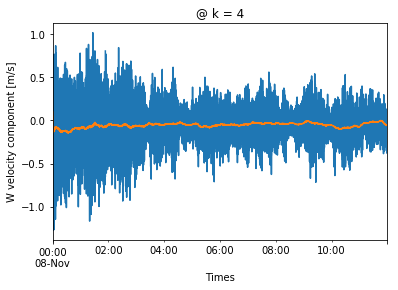

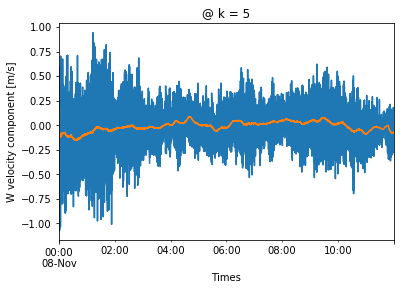

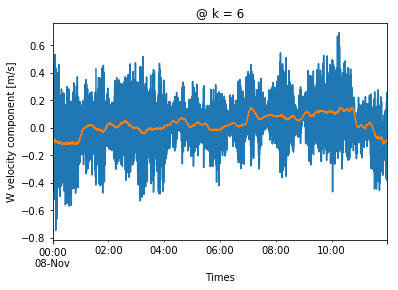

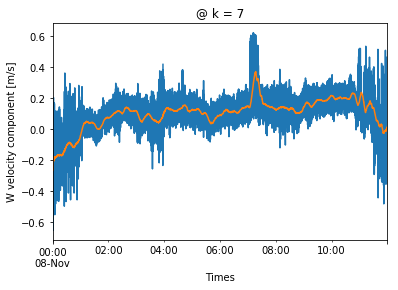

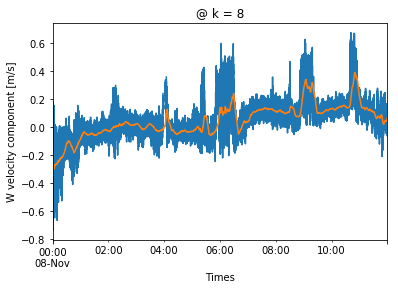

In [13]:
for k in range(9):
    plt.figure()
    pdDF.xs(k,level=1)[pdDF.xs(k,level=1).index.hour < 12][plotvar].plot()
    dfm0 = pdDF.xs(k,level=1)[pdDF.xs(k,level=1).index.hour < 12][plotvar].rolling('10min').mean()
    dfm0.plot()
    plt.ylabel('W velocity component [m/s]')
    plt.title('@ k = {:d}'.format(k))